# Download data and split train/test

In [3]:
from pyrecdp.datasets import ibm_fraud_detect

full_data = ibm_fraud_detect().to_pandas()
train_data = full_data[full_data['Year'] <= 2018]
train_data.to_csv("ibm_fraud_detect_train.csv", index = False)
test_data = full_data[full_data['Year'] > 2018]
test_data.to_csv("ibm_fraud_detect_test.csv", index = False)

# RecDP end to end pipeline

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
train_data = pd.read_csv("ibm_fraud_detect_train.csv")

In [2]:
from pyrecdp.autofe import FeatureWrangler, DataEstimator

data_pipeline = FeatureWrangler(dataset=train_data, label="Is Fraud?")

def train_test_splitter(df):
    test_sample = df[df['Year'] == 2018]
    train_sample = df[df['Year'] < 2018]
    return train_sample, test_sample

config = {
    'model_file': 'test_frauddetect.mdl',
    'metrics': 'auc', 
    'objective': 'binary', 
    'model_name': 'lightgbm',
    'train_test_splitter': train_test_splitter}
train_pipeline = DataEstimator(method = 'train', data_pipeline = data_pipeline, config = config)
train_pipeline.fit_transform()

{0: DataFrame, 1: type_infer, 2: fillna, 3: rename, 4: categorify, 5: DataFrame, 6: type_infer, 7: string_to_number, 8: fillna, 9: rename, 10: datetime_feature, 11: drop, 12: categorify, 13: onehot_encode, 14: list_onehot_encode, 15: rename, 16: drop, 17: astype, 18: lightgbm}
execute with pandas started ...
execute DataFrame started ...
  execute DataFrame took 8.95909033715725e-06 sec
execute type_infer started ...
  execute type_infer took 2.577085979282856e-05 sec
execute fillna started ...
  execute fillna took 1.1962301929015666 sec
execute rename started ...
  execute rename took 1.4933149230200797 sec
execute categorify started ...
  execute categorify took 3.5959431959781796 sec
execute DataFrame started ...
  execute DataFrame took 1.257401891052723e-05 sec
execute type_infer started ...
  execute type_infer took 5.058015961898491 sec
execute string_to_number started ...
  execute string_to_number took 23.5212089731358 sec
execute fillna started ...
  execute fillna took 11.4

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_w

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Number of positive: 25179, number of negative: 20579668
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.987241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16031
[LightGBM] [Info] Number of data points in the train set: 20604847, number of used features: 37


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001222 -> initscore=-6.706049
[LightGBM] [Info] Start training from score -6.706049
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.987224
  execute lightgbm took 82.99053579103202 sec
execute with pandas took 294.4621047968976 sec


In [6]:
transformed_data

,User,Card,Year,Month,Day,Merchant_Name,Zip,MCC,Is_Fraud,Amount__string_to_number,Time__day,Time__month,Time__weekday,Time__year,Time__hour,Use_Chip__idx,Merchant_City__idx,Merchant_State__idx,Errors__idx,Card__0,Card__1,Card__2,Card__3,Card__4,Card__5,Card__6,Card__7,Card__8,Use_Chip__Chip_Transaction,Use_Chip__Online_Transaction,Use_Chip__Swipe_Transaction,Errors_Bad_CVV,Errors_Bad_Card_Number,Errors_Bad_Expiration,Errors_Bad_PIN,Errors_Bad_Zipcode,Errors_Insufficient_Balance,Errors_Technical_Glitch
0,0,0,2002,9,1,3527213246127876953,91750.0,5300,0,134,27,3,0,2023,6,2,6226,29,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,2002,9,1,-727612092139916043,91754.0,5411,0,38,27,3,0,2023,6,2,7764,29,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,2002,9,2,-727612092139916043,91754.0,5411,0,120,27,3,0,2023,6,2,7764,29,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,2002,9,2,3414527459579106770,91754.0,5651,0,128,27,3,0,2023,17,2,7764,29,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2002,9,3,5817218446178736267,91750.0,5912,0,104,27,3,0,2023,6,2,6226,29,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326457,1999,1,2018,12,30,-3345936507911876459,3102.0,7538,0,50,27,3,0,2023,11,0,7055,135,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
22326458,1999,1,2018,12,30,-5841929396161652653,-1.0,4121,0,46,27,3,0,2023,20,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
22326459,1999,1,2018,12,31,-7421093378627544099,-1.0,5311,0,5,27,3,0,2023,9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
22326460,1999,1,2018,12,31,2910328604019547969,3055.0,7538,0,77,27,3,0,2023,11,0,7579,135,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# View Pipeline

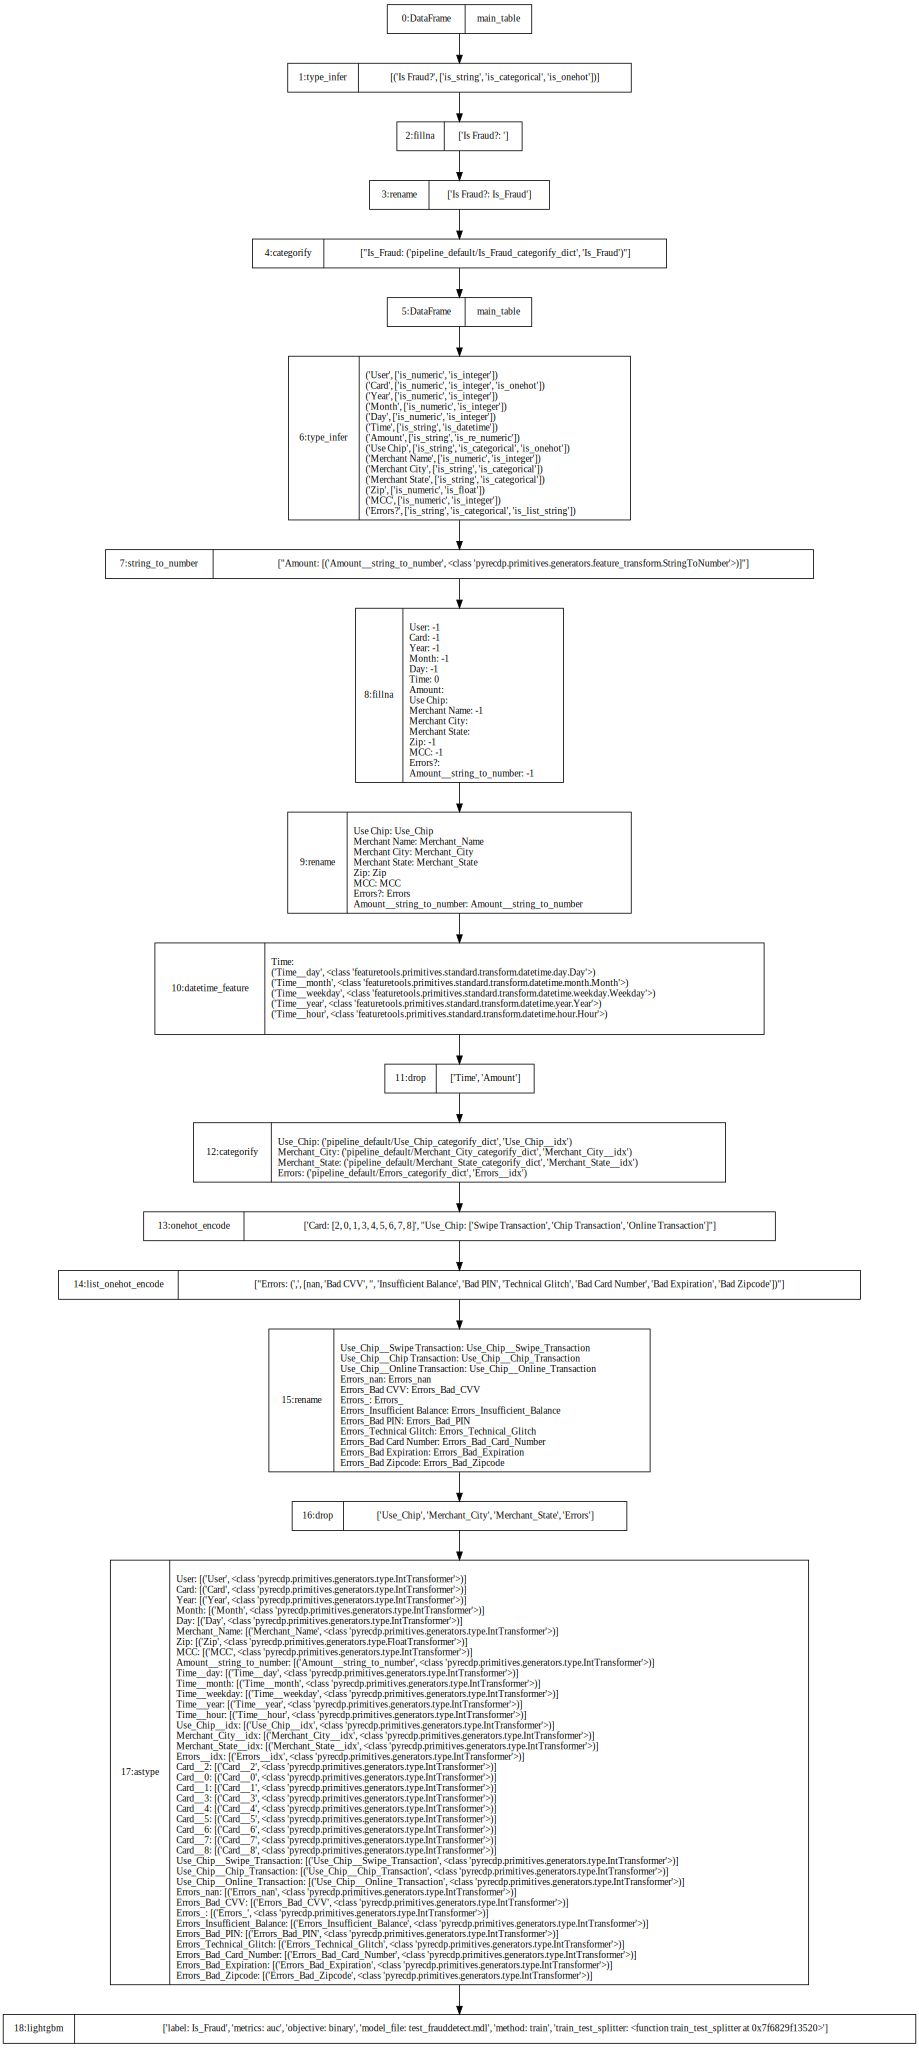

In [3]:
train_pipeline.plot()

In [4]:
train_pipeline.export('fraud_detect.json')